In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import time
import pickle
import numpy as np

In [2]:
import os

# Preprocessing of raw data

In [3]:
json_files = [file for file in os.listdir('./2024_sep/dump_mos') if file.endswith('.json')]

In [4]:
json_files

['dump00000000000010098810.json',
 'dump00000000000010502080.json',
 'dump00000000000011372295.json',
 'dump00000000000013022090.json',
 'dump00000000000002624210.json',
 'dump00000000000005585025.json',
 'dump00000000000011493379.json',
 'dump00000000000009375431.json',
 'dump00000000000008399570.json',
 'dump00000000000011760426.json',
 'dump00000000000012149684.json',
 'dump00000000000008434137.json',
 'dump00000000000005111317.json',
 'dump00000000000008258773.json',
 'dump00000000000008321725.json',
 'dump00000000000010670548.json',
 'dump00000000000011358316.json',
 'dump00000000000011959426.json',
 'dump00000000000008383949.json',
 'dump00000000000012316453.json',
 'dump00000000000011604034.json',
 'dump00000000000011384823.json',
 'dump00000000000010862036.json',
 'dump00000000000006242029.json',
 'dump00000000000003394666.json',
 'dump00000000000002500550.json',
 'dump00000000000009648075.json',
 'dump00000000000001597942.json',
 'dump00000000000011346364.json',
 'dump00000000

## List of candidates

In [24]:
data_conf = []
for json_file in json_files:
    with open('./2024_sep/dump_mos/'+json_file, 'r') as f:
        for line in f:
            d = json.loads(line)
            if 'Type' in d.keys():
                if d['Type'] == 'ballotConfig':
                    data_conf.append(d)

In [25]:
ios = []
names = []
ids = []

for d1 in data_conf:
    for c in d1['DecodeData']['StorageBallotConfig']['Candidates']:
        ids.append(c['Id'])
        names.append(c['Name'])
        ios.append(d1['DecodeData']['StorageBallotConfig']['Io'])

In [26]:
df_candidates = pd.DataFrame({'id': ids, 'Io': ios, 'name': names})

In [27]:
df_candidates

id  Io                           name
0    10524844  38  АКУЛОВА Светлана Владимировна
1     3501347  38      ЗАГРЕБНОЙ Юрий Леонтьевич
2    12557183  38  ЗАХАРОВ Дмитрий Александрович
3     5718461  38    ИЩЕНКО Александр Алексеевич
4     3963915  38   СЕВАСТЬЯНОВА Анна Алексеевна
..        ...  ..                            ...
697  10846155  46      САВИЦКАЯ Ирина Алексеевна
698    651923  46     СОКОЛОВ Павел Владимирович
699  11088815  46  ФЕДОТОВА Ульяна Александровна
700  13562194  46  ХАБАРОВА Людмила Валентиновна
701   3593336  46      ШОСТАК Алина Владимировна

[702 rows x 3 columns]

In [13]:
df_candidates.to_csv('candidates.csv')

## Times of ballot storage

In [9]:
data_initial = {}
for json_file in json_files:
    with open('./2024_sep/dump_mos/'+json_file, 'r') as f:
        for line in f:
            d = json.loads(line)
            if 'Type' in d.keys():
                if d['Type'] == 'storeBallot':
                    data_initial[d['DecodeData']['StorageBallot']['Sid']] = d['DecodeData']['StorageBallot']['Timestamp']

## Decrypted ballots

In [ ]:
data = []
with open('./2024_sep/dump00000000000013908163.json', 'r') as f:
    for line in f:
        d = json.loads(line)
        if 'Type' in d.keys():
            if d['Type'] == 'decryptBallot':
                data.append(json.loads(line))

In [44]:
# data = []
# for json_file in json_files:
    # print(json_file)
with open('./2024_sep/dump00000000000013153908.json', 'r') as f:
    for line in f:
        d = json.loads(line)
        if 'Type' in d.keys():
            if d['Type'] == 'decryptBallot':
                data.append(json.loads(line))

In [53]:
timestamps = []
votes = []
elections = []
ios = []
# sources = []
sids = []

for i,d in enumerate(data):
    sids.append(d['DecodeData']['StorageDecodeBallot']['Sid'])
    elections.append(d['DecodeData']['StorageDecodeBallot']['VotingId'])
    ios.append(d['DecodeData']['StorageDecodeBallot']['Io'])
    votes.append(d['DecodeData']['StorageDecodeBallot']['DecryptedValue'])
    try:
        timestamps.append(data_initial[d['DecodeData']['StorageDecodeBallot']['Sid']])
    except:
        print(i)

In [47]:
len(timestamps)

3170565

In [58]:
timestamps = [pd.Timestamp(t, unit = 's') for t in timestamps]

In [59]:
timestamps = [t + pd.Timedelta(hours = 3) for t in timestamps]

In [61]:
df_result = pd.DataFrame({'sid': sids,
                          'VotingId': elections,
                          'Io': ios,
                          'timestamp': timestamps,
                          'vote': votes
                         })

In [16]:
df_md = df_result[df_result['VotingId'] == 'd7bd531f-e8fb-4310-9230-8086902304e9']

In [18]:
df_md['vote'] = [v[1:-1].split(',') for v in df_md['vote']]

/tmp/ipykernel_605075/2188891340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_md['vote'] = [v[1:-1].split(',') for v in df_md['vote']]


In [21]:
df_md['vote'] = [int(v[0]) for v in df_md['vote']]

/tmp/ipykernel_605075/3984305722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_md['vote'] = [int(v[0]) for v in df_md['vote']]


In [21]:
df_md.to_csv('RESULTS_MD.csv', index = False)

In [10]:
df_md = pd.read_csv('RESULTS_MD.csv')

In [14]:
cand_dict = {}
for i in df_candidates.index:
    cand_dict[df_candidates['id'].loc[i]] = df_candidates['name'].loc[i]

In [19]:
df_md['candidate'] = [cand_dict[v] for v in df_md['vote']]

In [11]:
min(df_md['timestamp'])

'2024-09-06 08:00:32'

In [13]:
df_md = df_md.sort_values('timestamp')

In [20]:
df_md

sid  \
2452418  5d310a81-3df8-4ee8-80f0-1043574a6873   
2400783  a3cabc30-61a3-4618-a338-939d5e32eb3e   
2445552  2bb22859-0aa0-4b52-b330-73ea571482c8   
1102117  37e5a0a5-2c1f-446d-ab4d-adcd1c0cfa3d   
2500514  0575dcdf-67cb-4337-a5dd-ded118597f7f   
...                                       ...   
1978602  05158f03-2a64-4b0c-98b0-be562451cfde   
2902978  591cf058-af9d-4e56-9ed7-7f32e7873761   
2816122  3c0b2028-3c73-4526-b037-8f82fe799fc0   
1792706  93786bf0-f976-421b-a547-7c6d138cc61d   
2514348  4c359734-a9aa-44fe-9aa3-cafce2bd8dc7   

                                     VotingId  Io           timestamp  \
2452418  d7bd531f-e8fb-4310-9230-8086902304e9  37 2024-09-06 08:00:32   
2400783  d7bd531f-e8fb-4310-9230-8086902304e9  37 2024-09-06 08:00:32   
2445552  d7bd531f-e8fb-4310-9230-8086902304e9   6 2024-09-06 08:00:32   
1102117  d7bd531f-e8fb-4310-9230-8086902304e9  38 2024-09-06 08:00:32   
2500514  d7bd531f-e8fb-4310-9230-8086902304e9  32 2024-09-06 08:00:32   
...                                       ...  ..                 ...   
1978602  d7bd531f-e8fb-4310-9230-8086902304e9   9 2024-09-08 20:16:09   
2902978  d7bd531f-e8fb-4310-9230-8086902304e9  34 2024-09-08 20:16:09   
2816122  d7bd531f-e8fb-4310-9230-8086902304e9  33 2024-09-08 20:16:09   
1792706  d7bd531f-e8fb-4310-9230-8086902304e9  44 2024-09-08 20:16:09   
2514348  d7bd531f-e8fb-4310-9230-8086902304e9  34 2024-09-08 20:16:09   

             vote                      candidate  
2452418  13726630       СЛУЦКАЯ Ирина Эдуардовна  
2400783  13726630       СЛУЦКАЯ Ирина Эдуардовна  
2445552   3603681       ЦВЕТКОВА Сабина Алановна  
1102117   3501347      ЗАГРЕБНОЙ Юрий Леонтьевич  
2500514    398524  ВОРОПАЕВА Мария Александровна  
...           ...                            ...  
1978602  11953211   КАПИТОШИН Дмитрий Васильевич  
2902978  16461526   КИСЕЛЕВА Мария Александровна  
2816122  13408942      РОДЬКИНА Ирина Николаевна  
1792706   6071832    АРХИПОВ Игорь Александрович  
2514348  13381284     ГРЕБЕННИК Андрей Вадимович  

[2970633 rows x 6 columns]

In [22]:
df_md[['Io', 'timestamp', 'candidate']]

Io           timestamp                      candidate
2452418  37 2024-09-06 08:00:32       СЛУЦКАЯ Ирина Эдуардовна
2400783  37 2024-09-06 08:00:32       СЛУЦКАЯ Ирина Эдуардовна
2445552   6 2024-09-06 08:00:32       ЦВЕТКОВА Сабина Алановна
1102117  38 2024-09-06 08:00:32      ЗАГРЕБНОЙ Юрий Леонтьевич
2500514  32 2024-09-06 08:00:32  ВОРОПАЕВА Мария Александровна
...      ..                 ...                            ...
1978602   9 2024-09-08 20:16:09   КАПИТОШИН Дмитрий Васильевич
2902978  34 2024-09-08 20:16:09   КИСЕЛЕВА Мария Александровна
2816122  33 2024-09-08 20:16:09      РОДЬКИНА Ирина Николаевна
1792706  44 2024-09-08 20:16:09    АРХИПОВ Игорь Александрович
2514348  34 2024-09-08 20:16:09     ГРЕБЕННИК Андрей Вадимович

[2970633 rows x 3 columns]

In [23]:
df_md[['Io', 'timestamp', 'candidate']].to_csv('result_md_short.csv', index = False)

In [12]:
df_md['timestamp'] = [pd.Timestamp(t) for t in list(df_md['timestamp'])]

# Visualization

Constituency 1


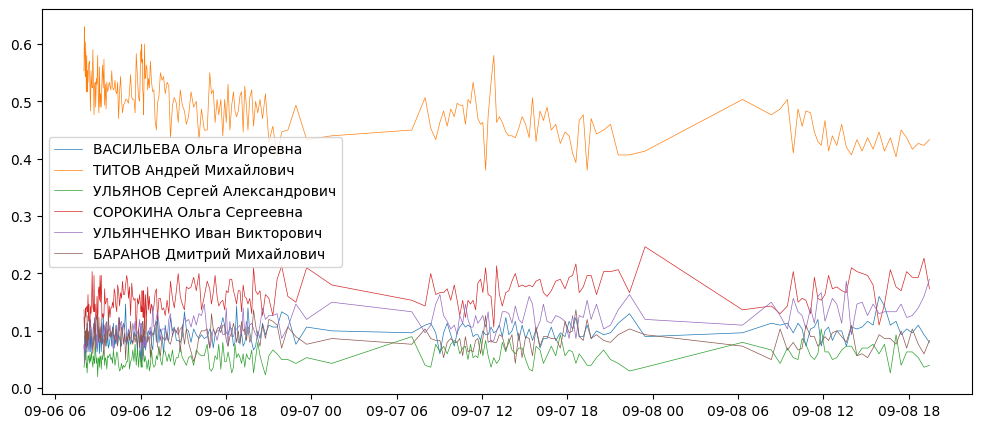

IN THIS CONSTITUENCY UNITED RUSSIA WAS LOSING:  2


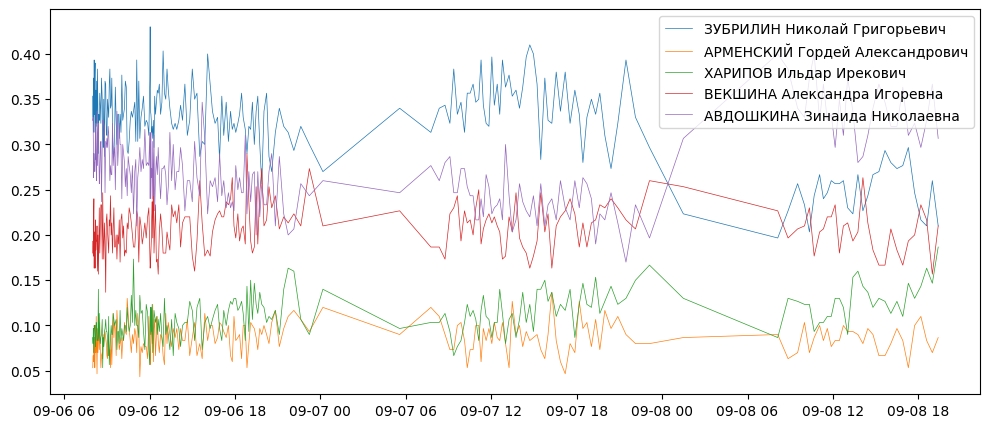

Constituency 3


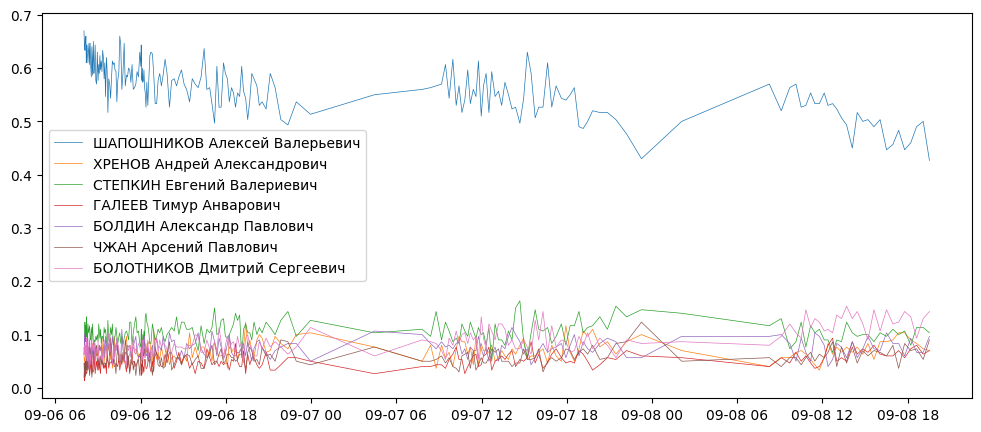

Constituency 4


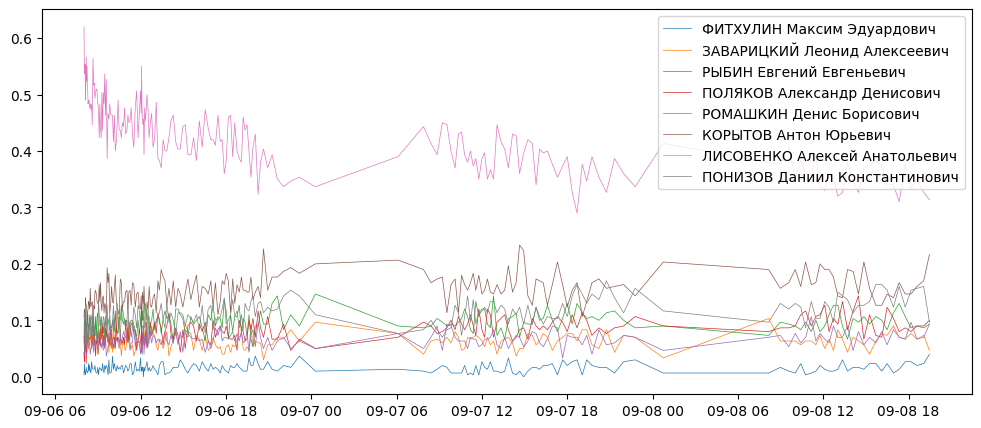

Constituency 5


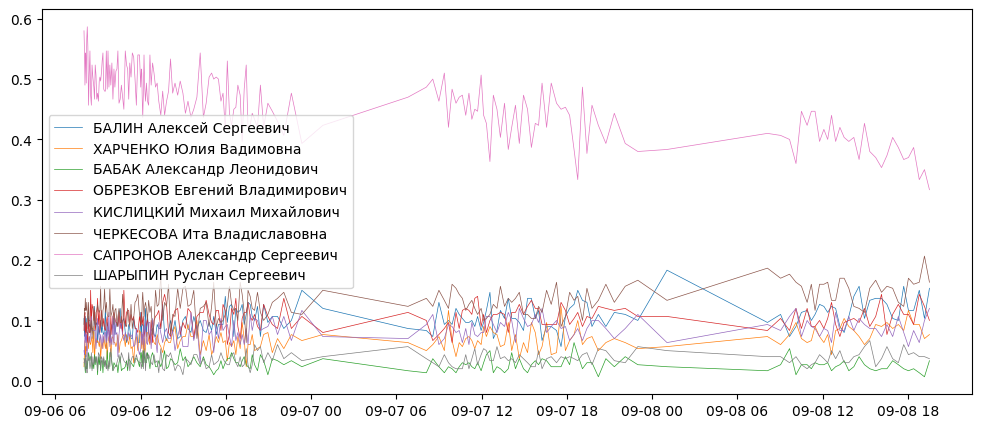

Constituency 6


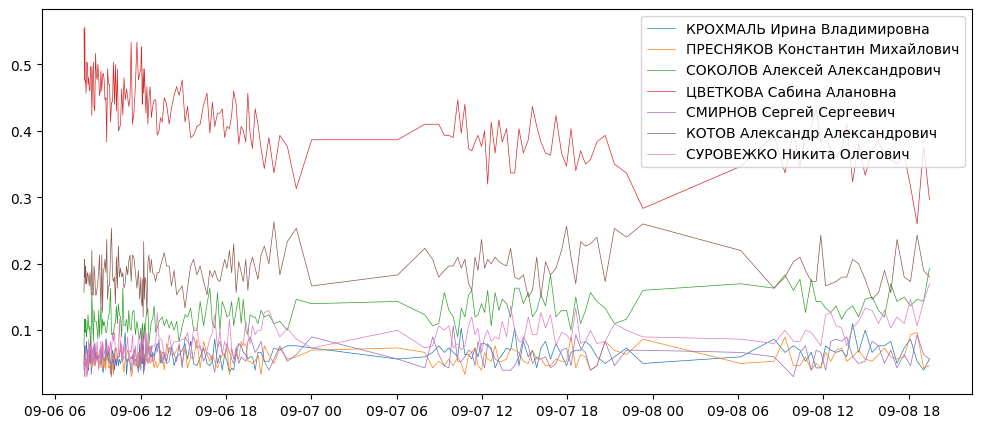

Constituency 7


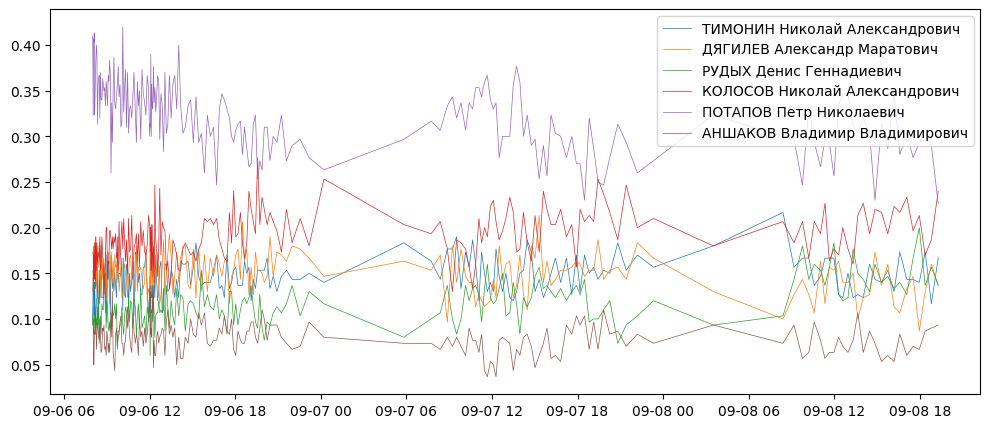

Constituency 8


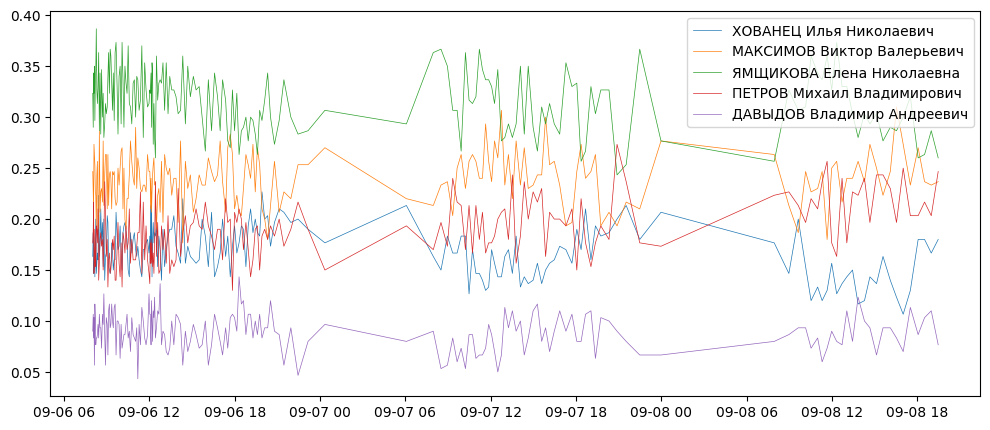

Constituency 9


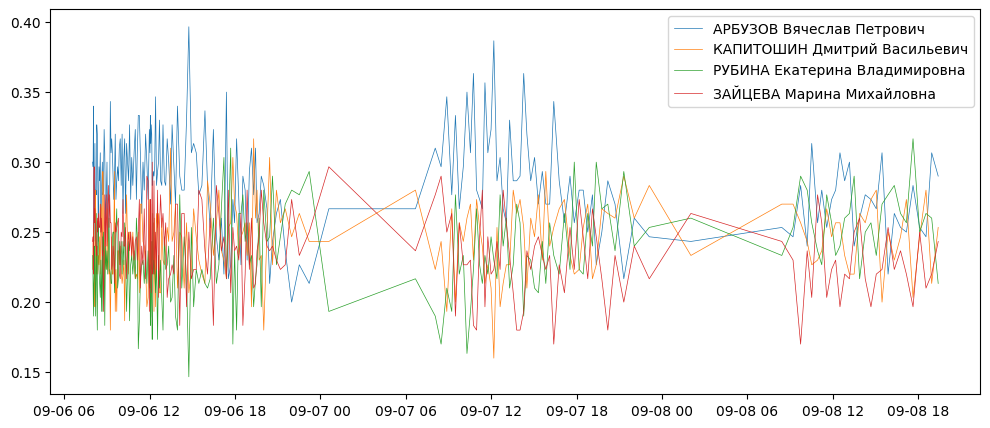

Constituency 10


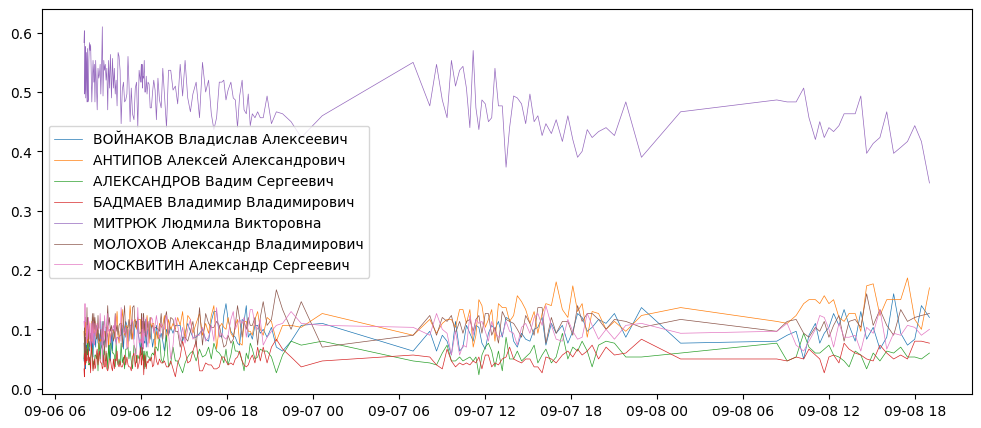

Constituency 11


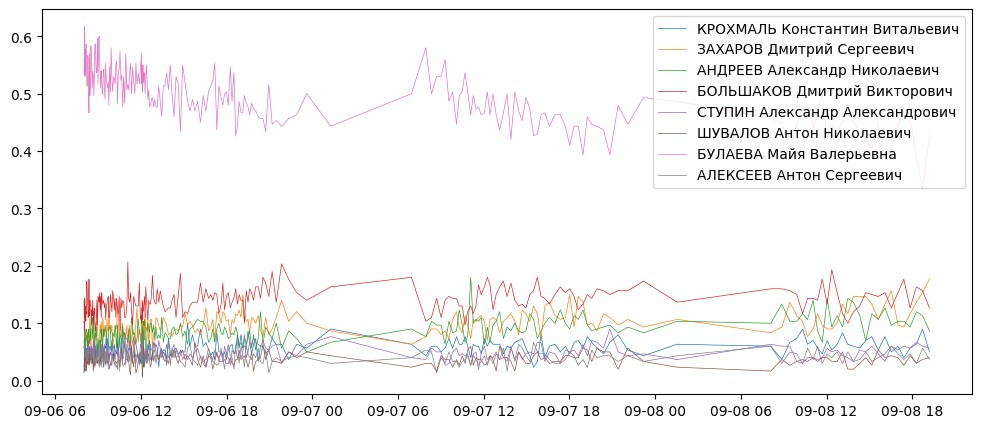

Constituency 12


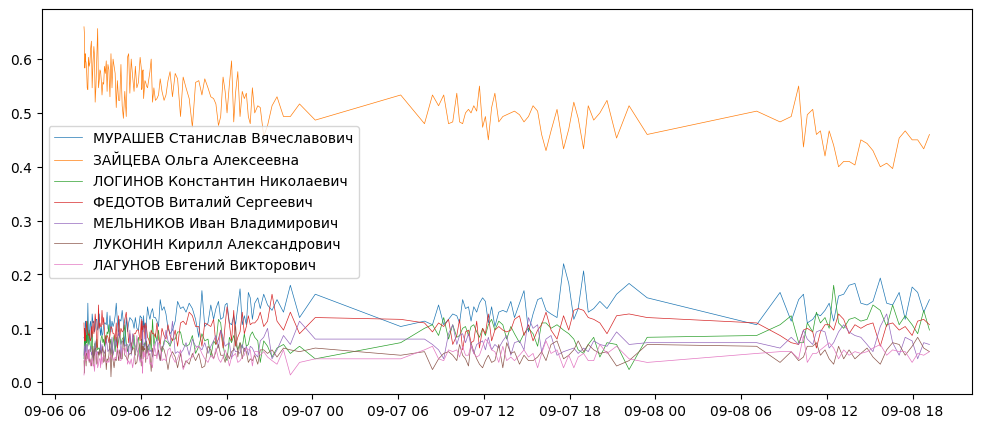

IN THIS CONSTITUENCY UNITED RUSSIA WAS LOSING:  13


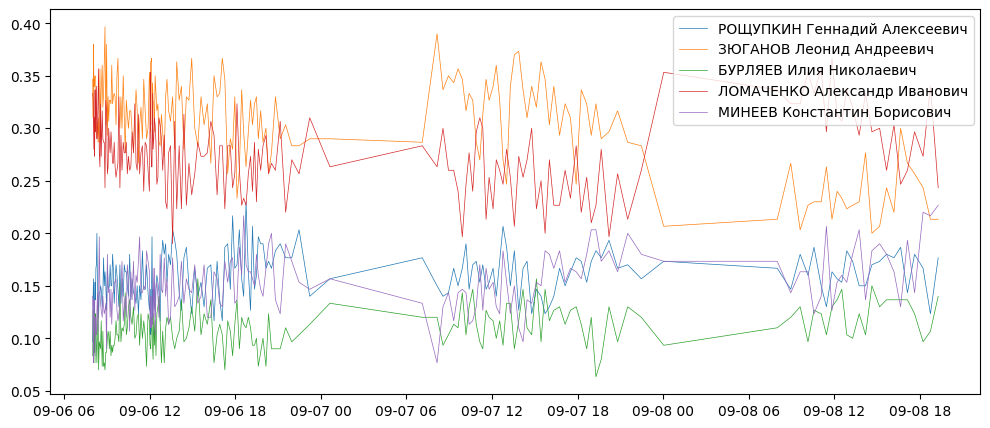

Constituency 14


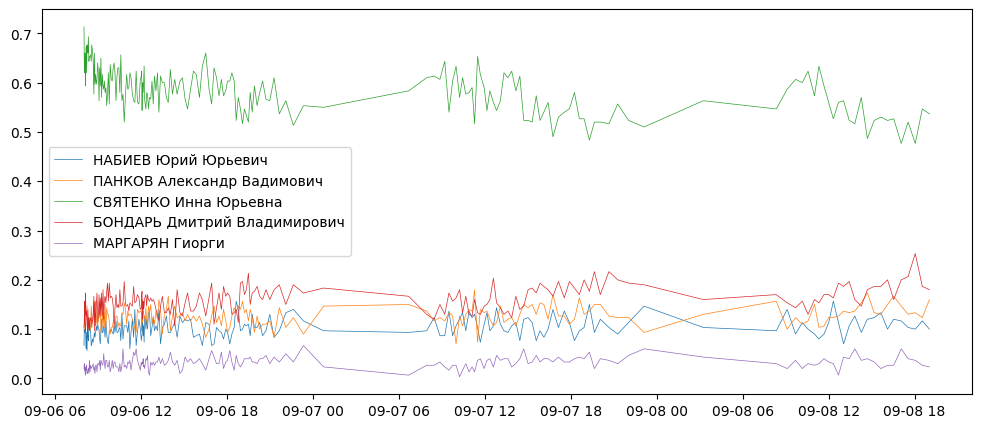

Constituency 15


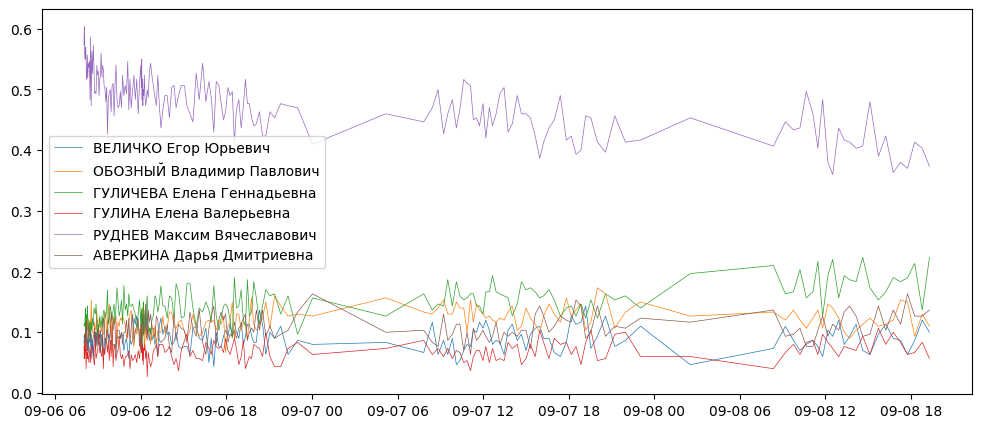

Constituency 16


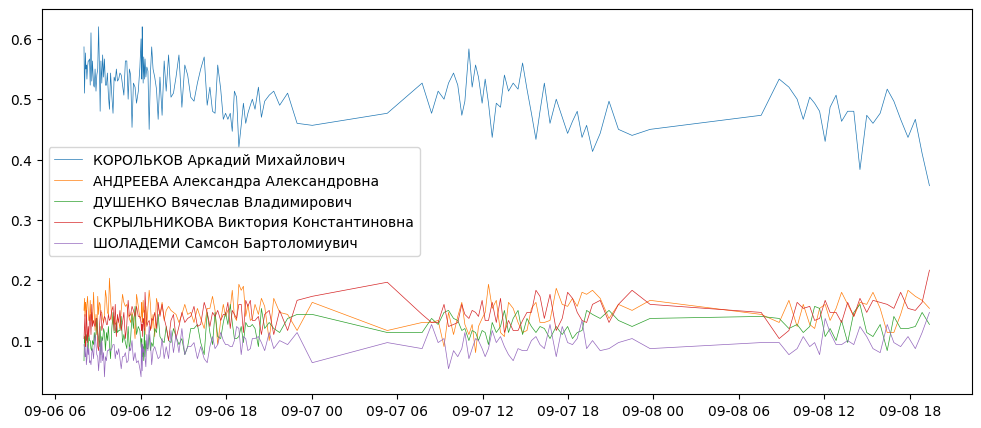

Constituency 17


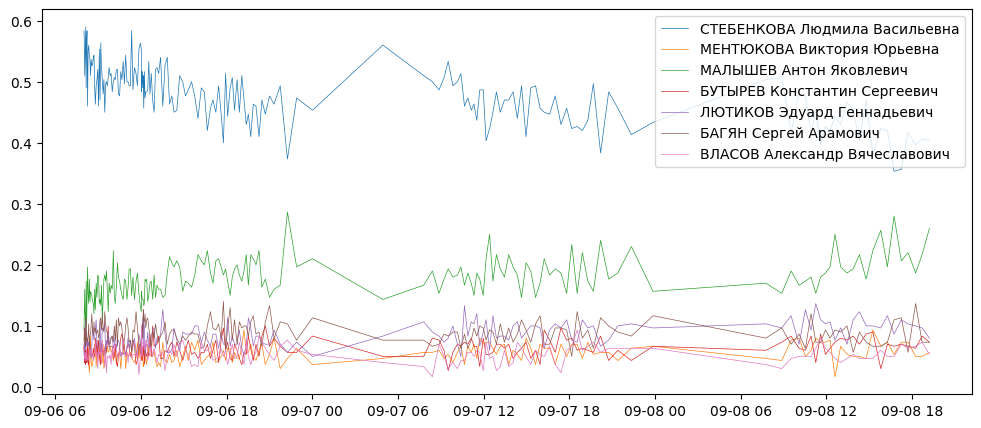

Constituency 18


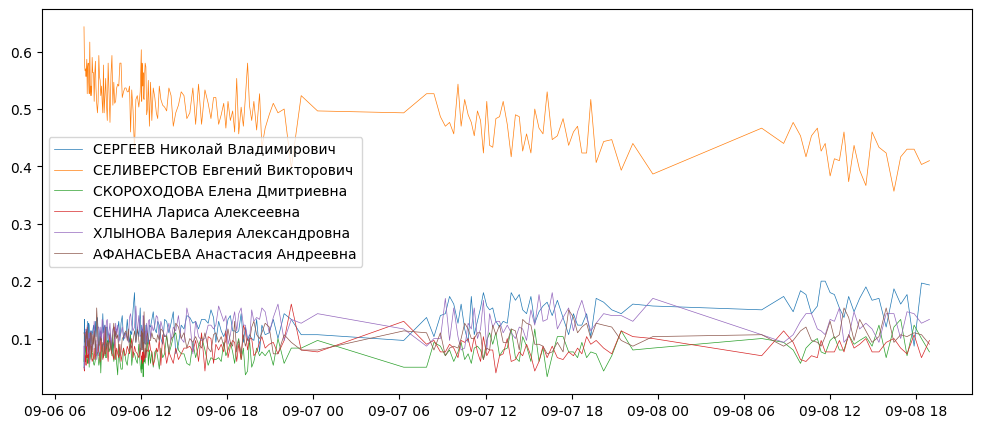

Constituency 19


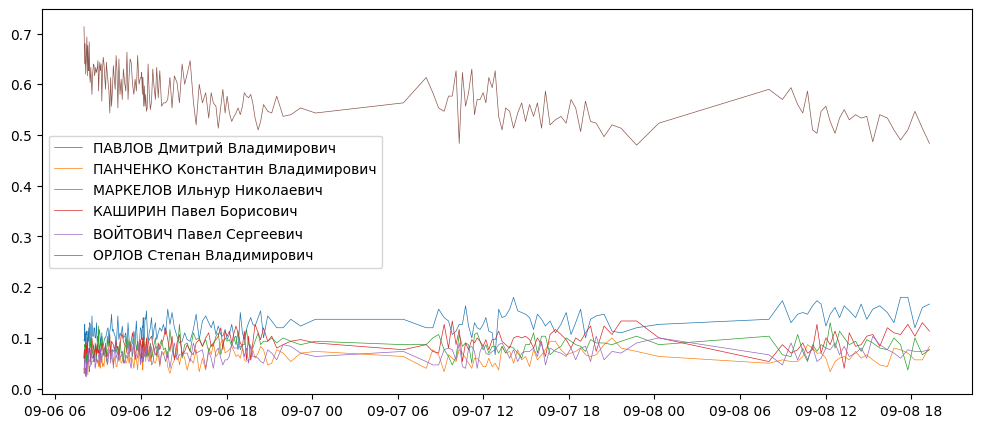

Constituency 20


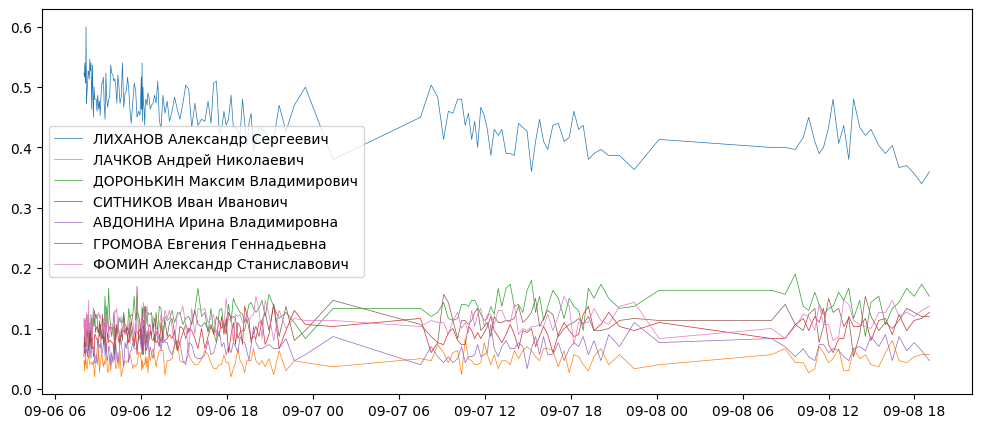

Constituency 21


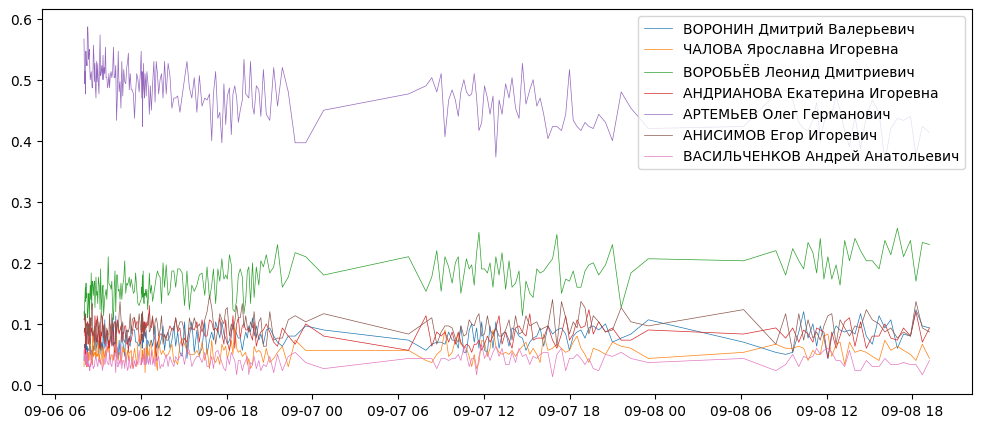

Constituency 22


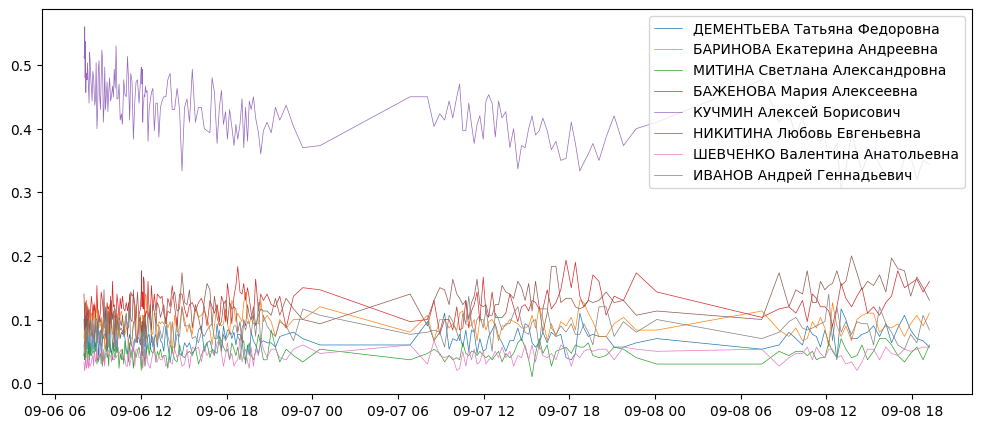

Constituency 23


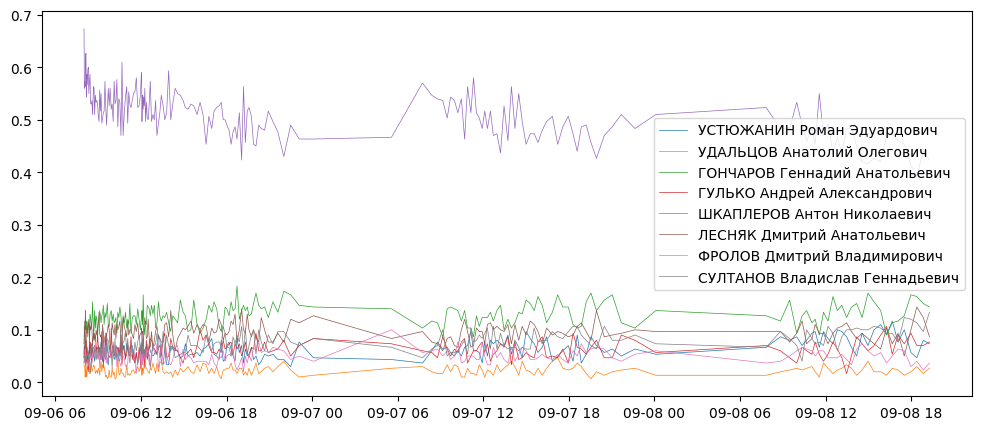

Constituency 24


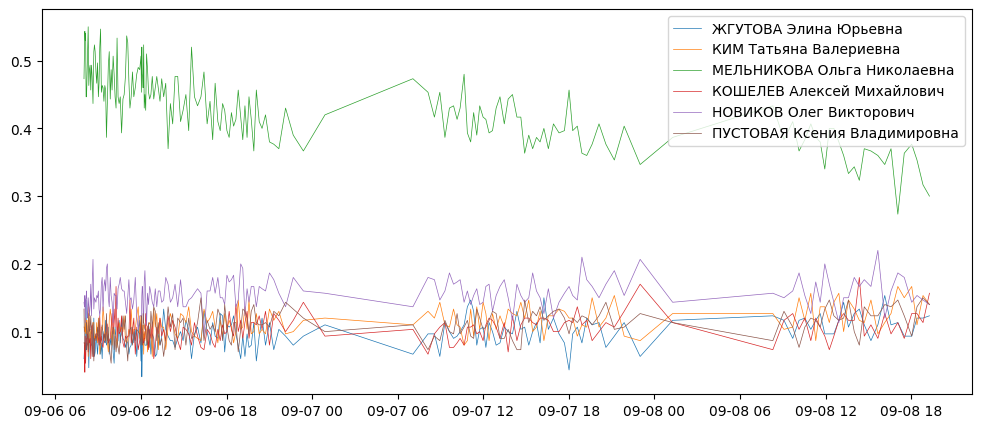

Constituency 25


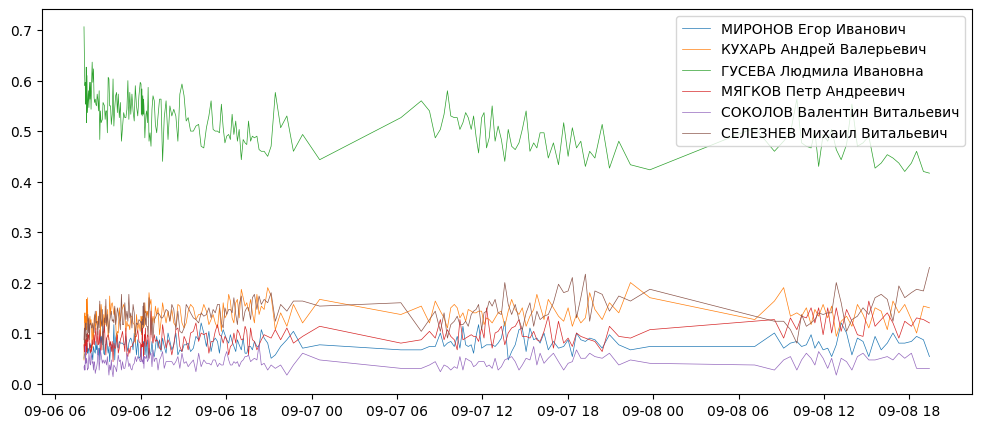

Constituency 26


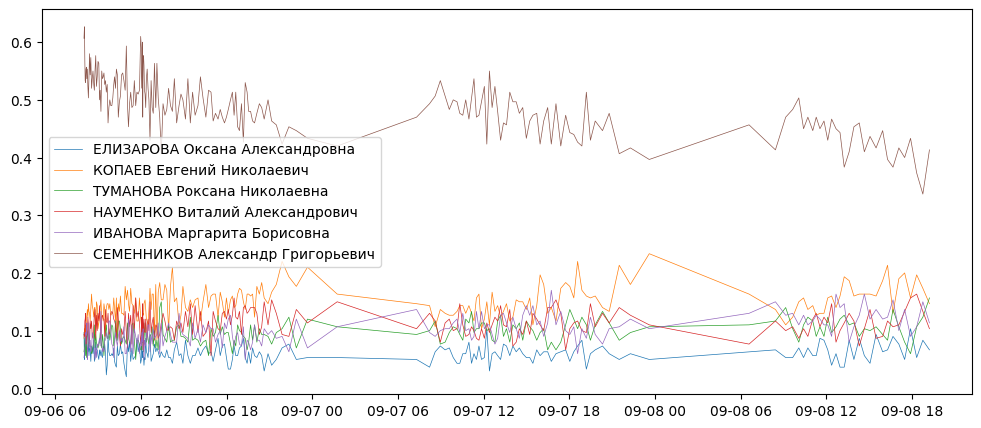

Constituency 27


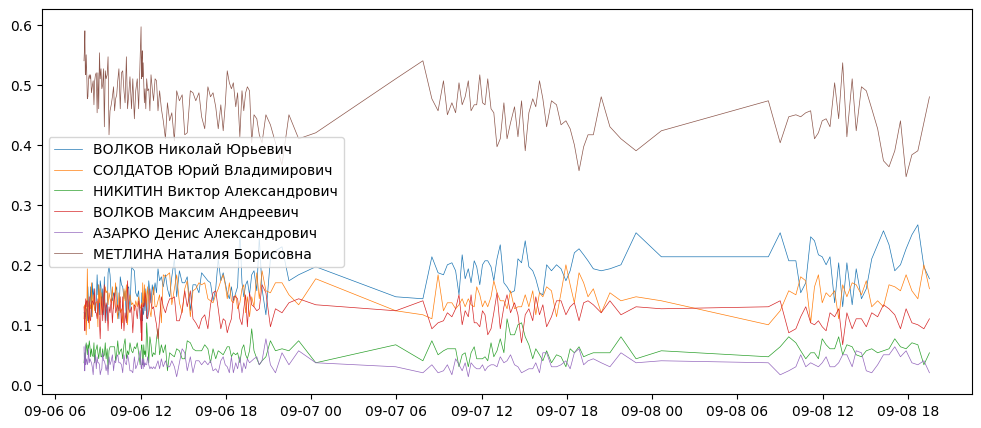

Constituency 28


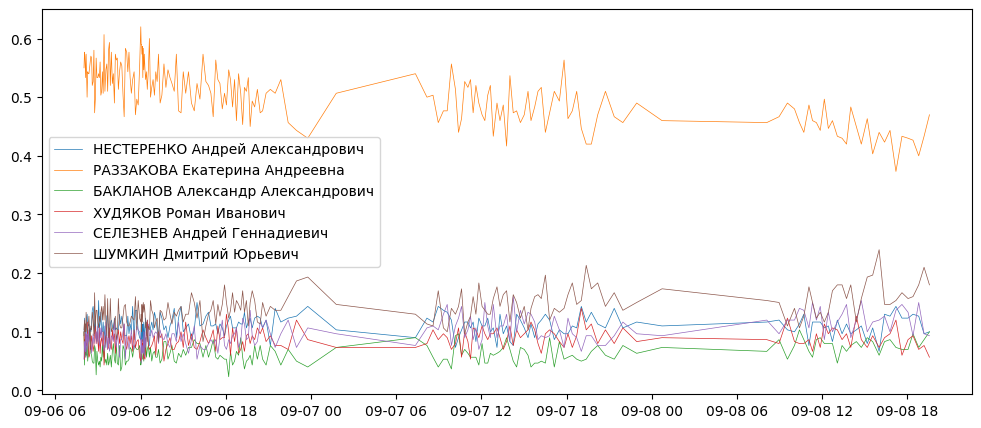

Constituency 29


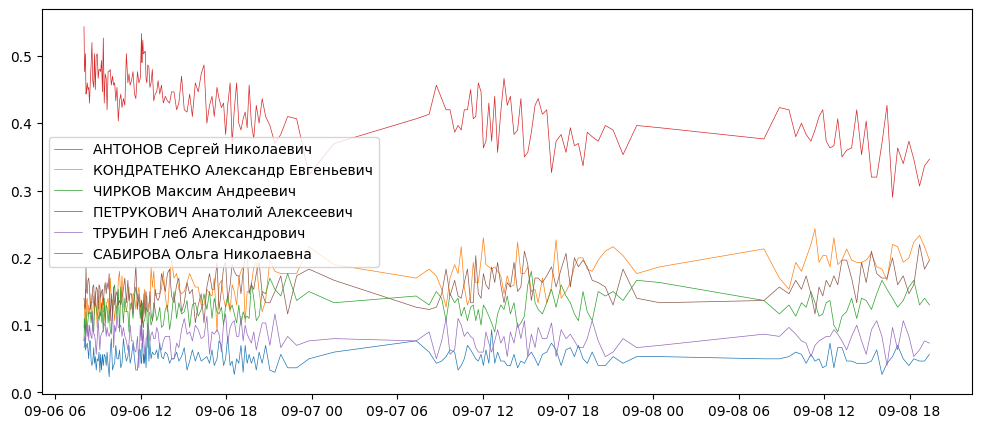

Constituency 30


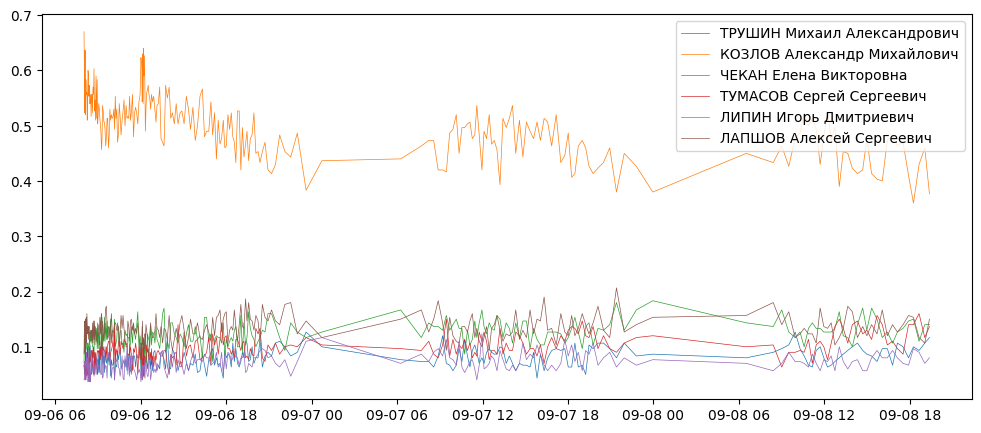

Constituency 31


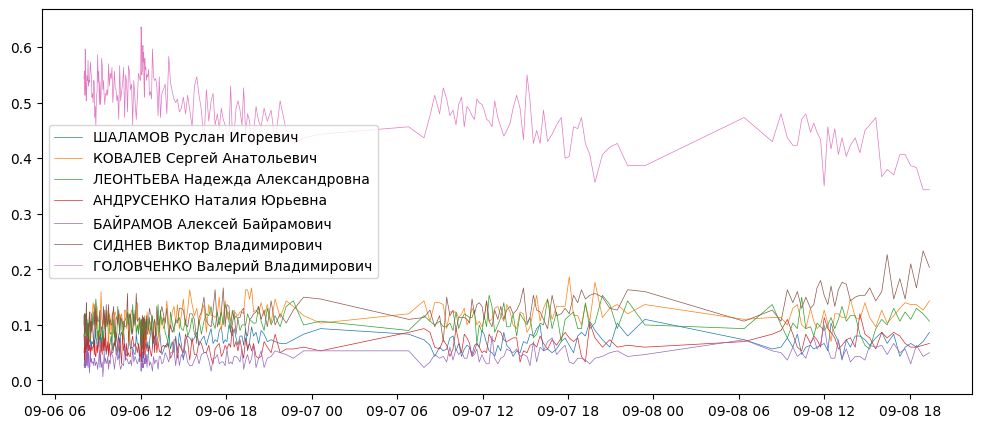

Constituency 32


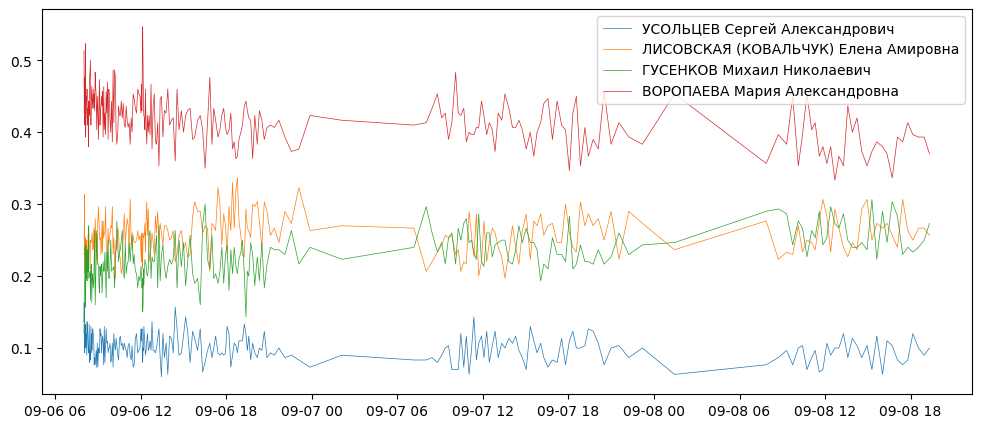

Constituency 33


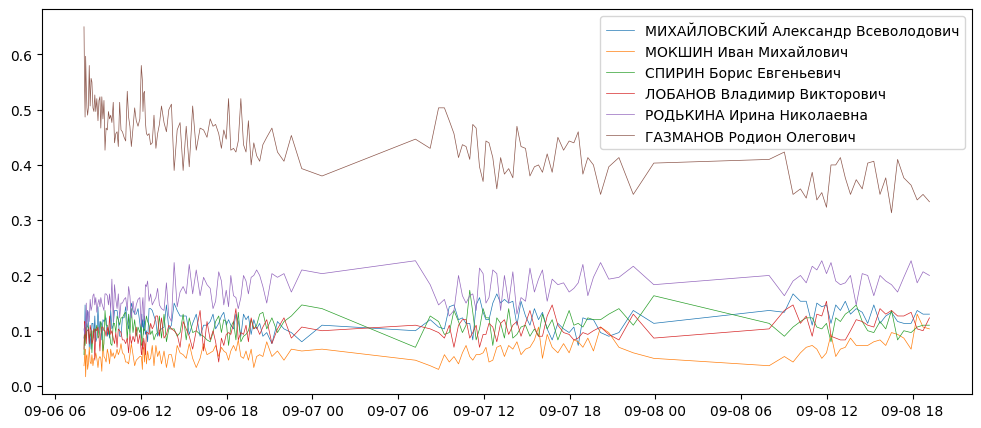

Constituency 34


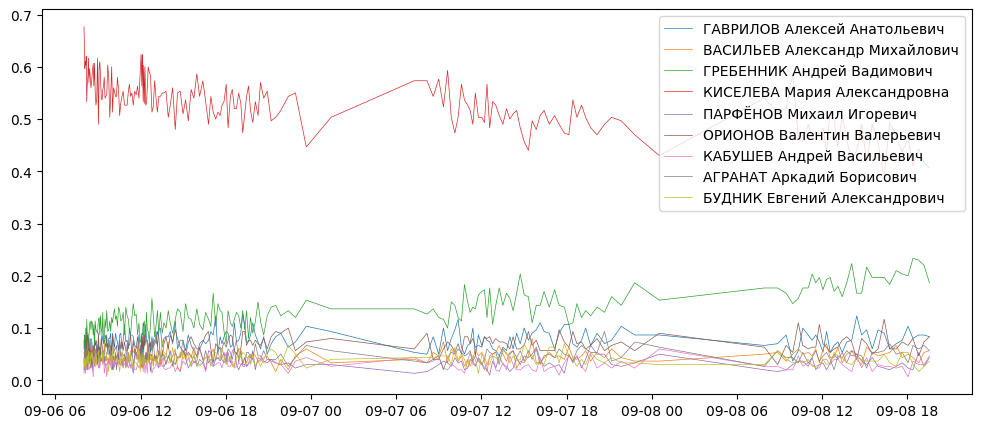

Constituency 35


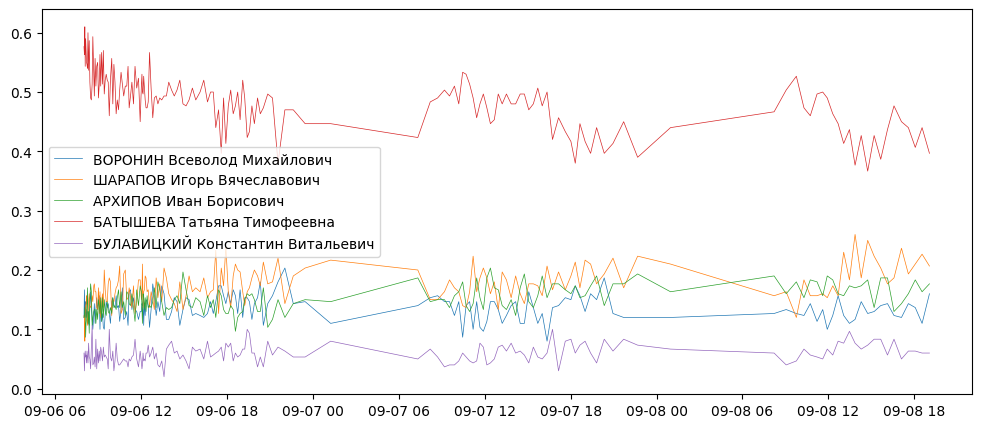

Constituency 36


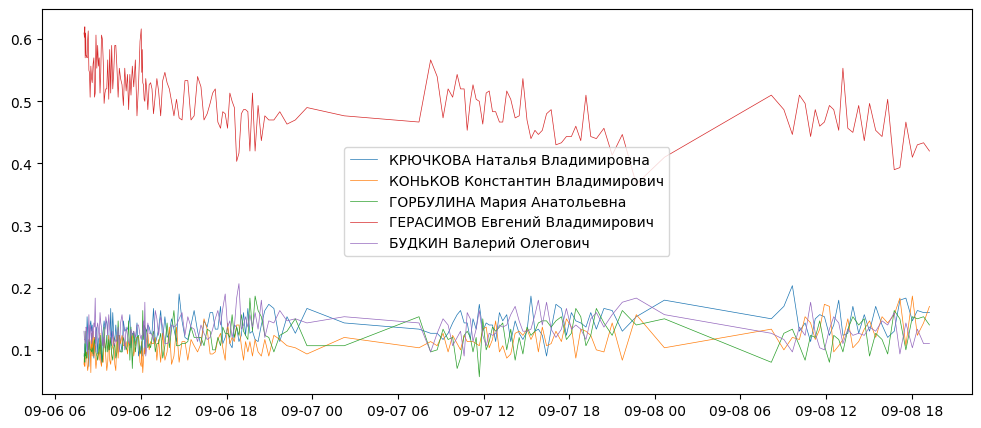

Constituency 37


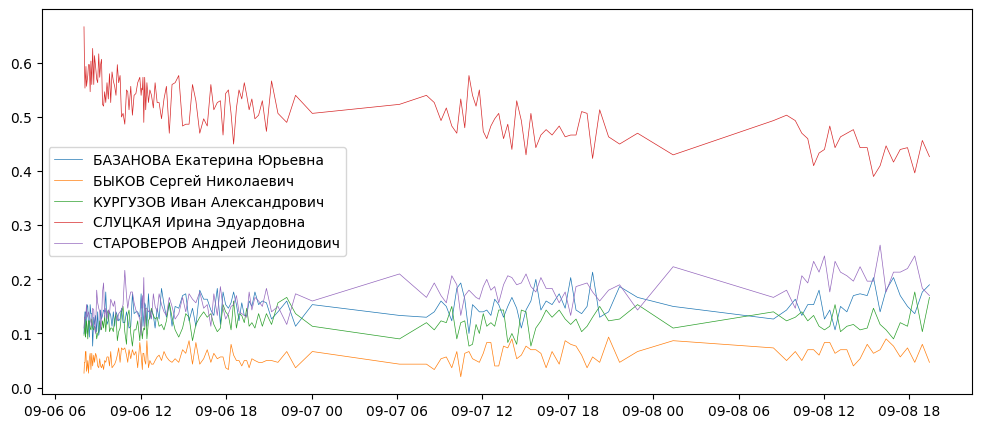

Constituency 38


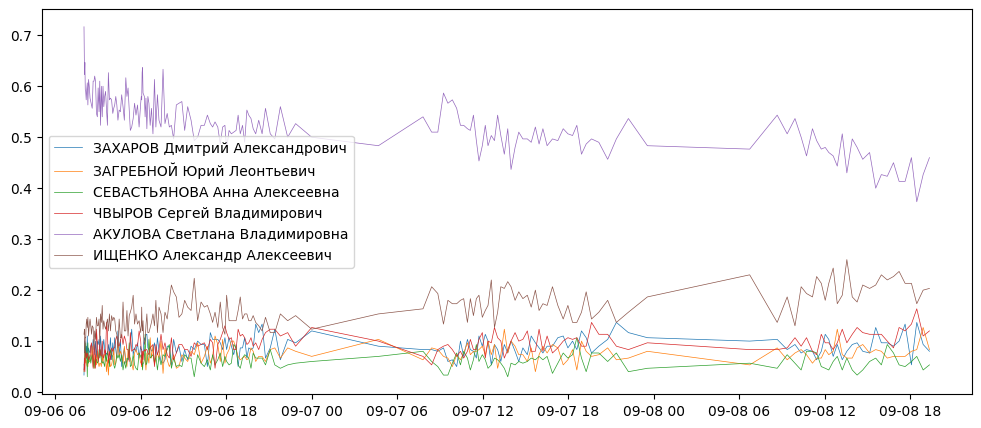

IN THIS CONSTITUENCY UNITED RUSSIA WAS LOSING:  39


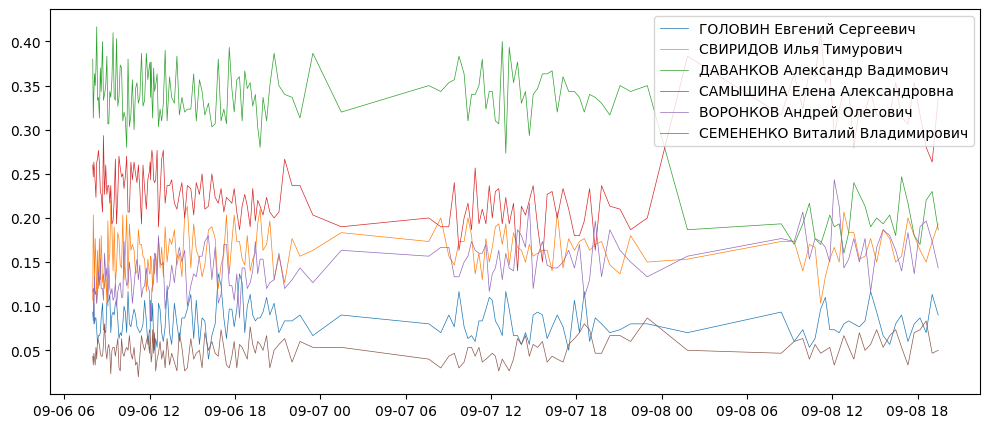

Constituency 40


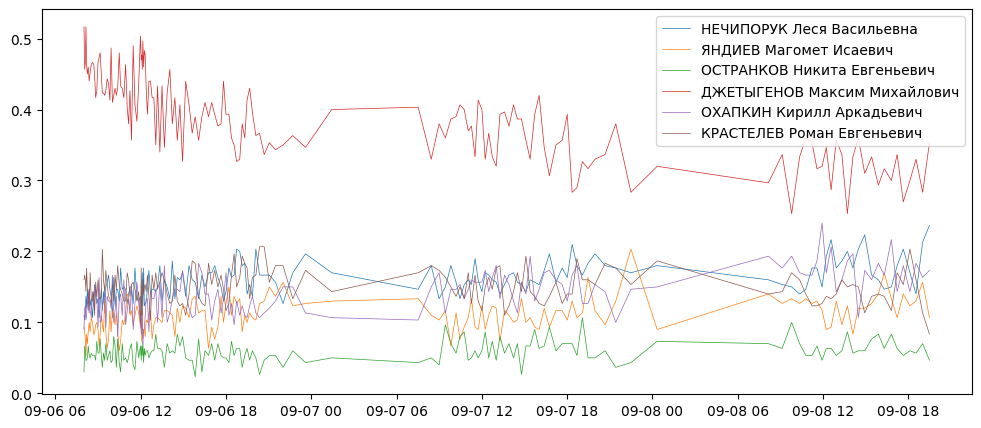

Constituency 41


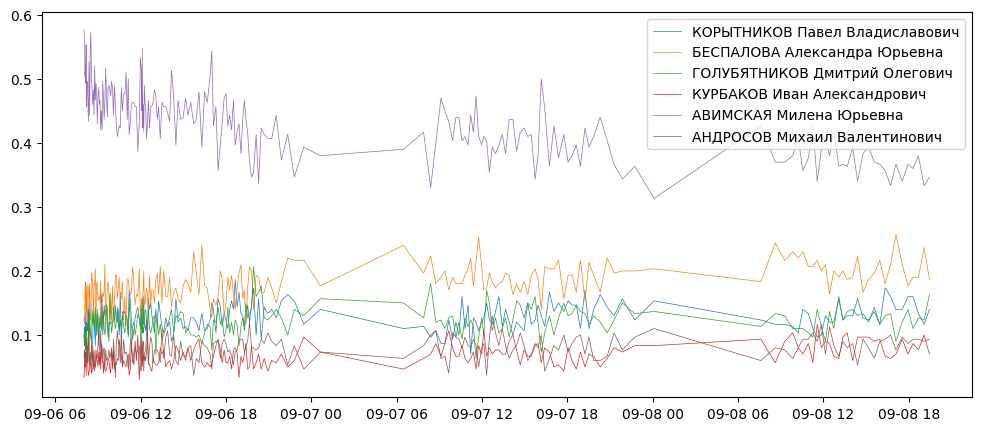

Constituency 42


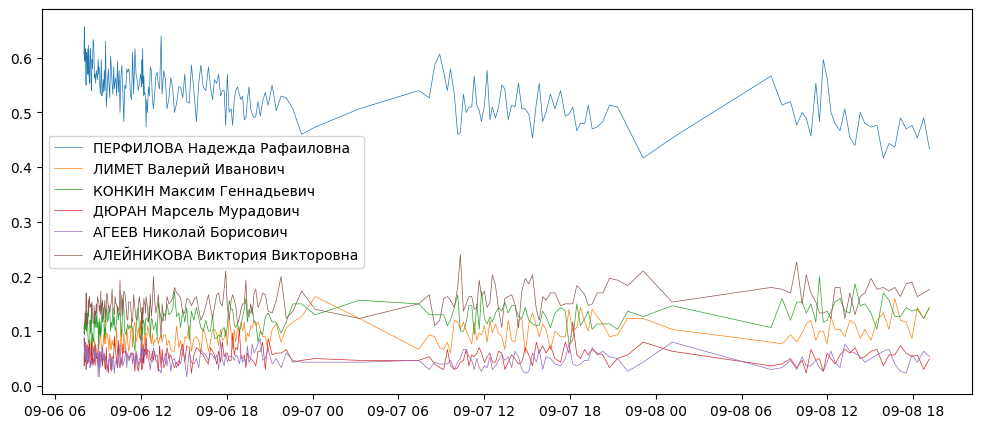

Constituency 43


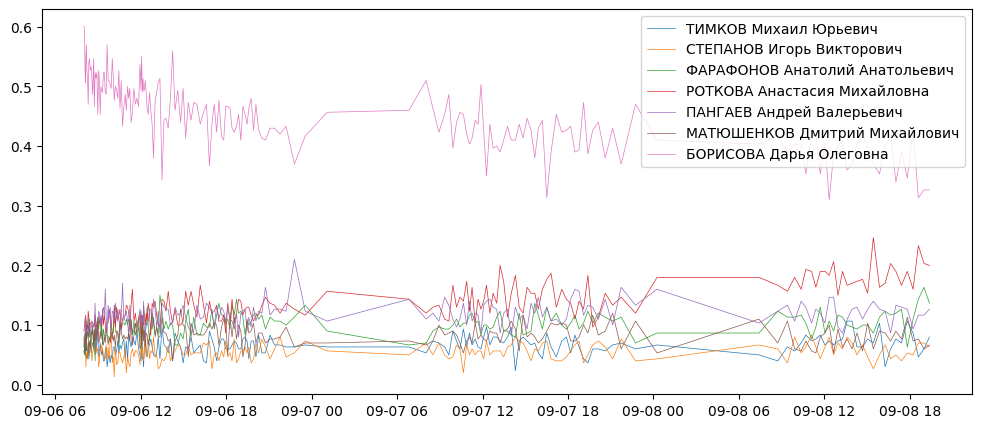

Constituency 44


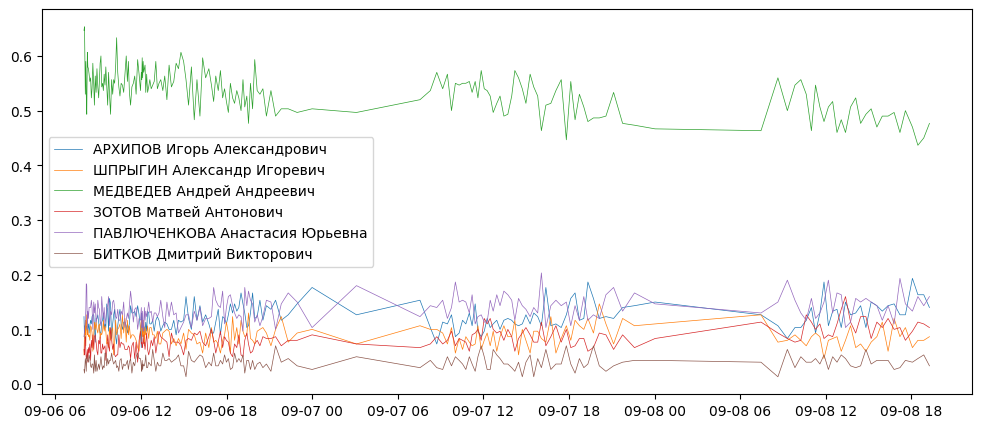

Constituency 45


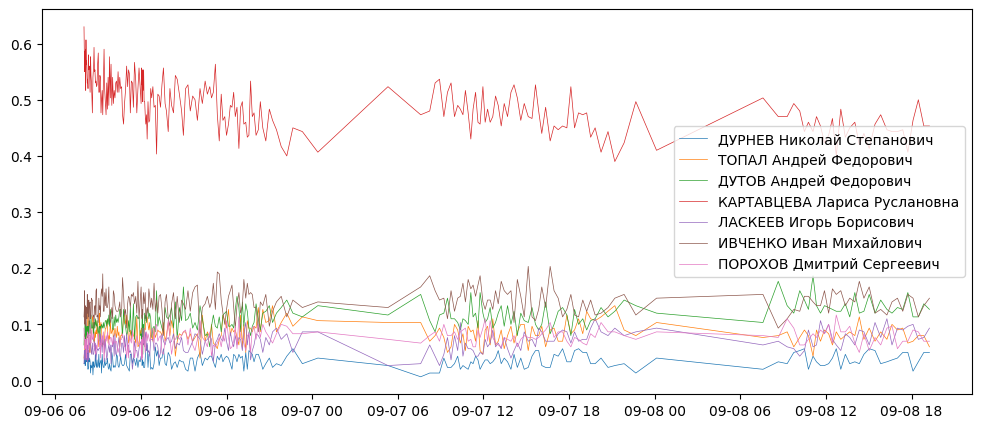

In [28]:
n = 300

for i in sorted(list(set(df_md['Io']))):
    df_io = df_md[df_md['Io'] == i]
    cands = list(set(df_io['candidate']))
    if i in [2,13,39]:
        print('IN THIS CONSTITUENCY UNITED RUSSIA WAS LOSING: ', i)
    else:
        print('Constituency', i)
    plt.figure(figsize = [12,5])
    times = []
    for i in range(int(len(df_io)/n)+1):
        times.append(df_io['timestamp'].iloc[i*n])
    for c in cands:
        n_cand = []
        for i in range(int(len(df_io)/n)+1):
            df_fr = df_io[i*n:(i+1)*n]
            df_cand = df_fr[df_fr['candidate'] == c]
            n_cand.append(len(df_cand)/n)
        plt.plot(times[:-1], n_cand[:-1], lw = 0.5)
        plt.legend(cands)
    plt.show()

In [18]:
i = 2

n = 300

df_io = df_md[df_md['Io'] == i]
cands = list(set(df_io['candidate']))
times = []
for i in range(int(len(df_io)/n)+1):
    times.append(df_io['timestamp'].iloc[i*n])

df = pd.DataFrame({'time': times})